## 數據集

我們將使用相同的數據集進行討論，涵蓋決策樹（Decision Tree）、隨機森林（Random Forests）和梯度提升樹（Gradient Boosted Trees）的分類，以便比較這些相關模型的性能指標。

我們將使用“Palmer Penguins”數據集，這個數據集足夠簡單，可以幫助我們完全理解超參數改變如何影響分類結果。

<img src="penguin.jpg" style="max-width:400px">

這些數據由Dr. Kristen Gorman和Palmer Station，南極LTER（一個長期生態研究網絡的成員）收集並提供。

Gorman KB, Williams TD, Fraser WR (2014) 《Ecological Sexual Dimorphism and Environmental Variability within a Community of Antarctic Penguins (Genus Pygoscelis)》。PLoS ONE 9(3): e90081. doi:10.1371/journal.pone.0090081



* penguins_size.csv：簡化的數據來自原始企鵝數據集。包含變量：

    * species：企鵝物種（帽帶企鵝、阿德利企鵝或紐帶企鵝）
    * culmen_length_mm：嘴峰長度（毫米）
    * culmen_depth_mm：嘴峰深度（毫米）
    * flipper_length_mm：鰭長度（毫米）
    * body_mass_g：體重（克）
    * island：在Palmer群島（南極洲）的島嶼名稱（Dream, Torgersen或Biscoe）
    * sex：企鵝性別

註：嘴峰是“鳥喙的上脊”

**我們的目標是創建一個模型，該模型可以根據物理屬性幫助預測企鵝的物種，然後我們可以使用該模型幫助研究人員在現場分類企鵝，而無需經驗豐富的生物學家**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("penguins_size.csv")

In [3]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


### Missing Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [5]:
df.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [6]:
df = df.dropna()#移除空值

In [7]:
df.isna().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [8]:
df["sex"].unique()

array(['MALE', 'FEMALE', '.'], dtype=object)

In [9]:
df["island"].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [11]:
df = df[df["sex"] != '.']#過濾是.的性別

In [12]:
df["sex"].unique()

array(['MALE', 'FEMALE'], dtype=object)

<Axes: xlabel='culmen_length_mm', ylabel='culmen_depth_mm'>

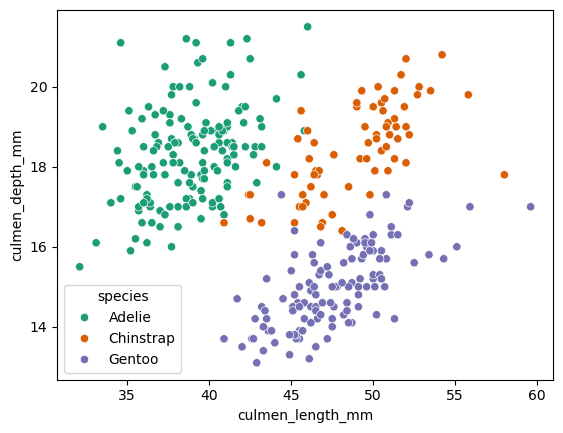

In [13]:
sns.scatterplot(x="culmen_length_mm",y='culmen_depth_mm',data=df,hue="species",palette="Dark2")

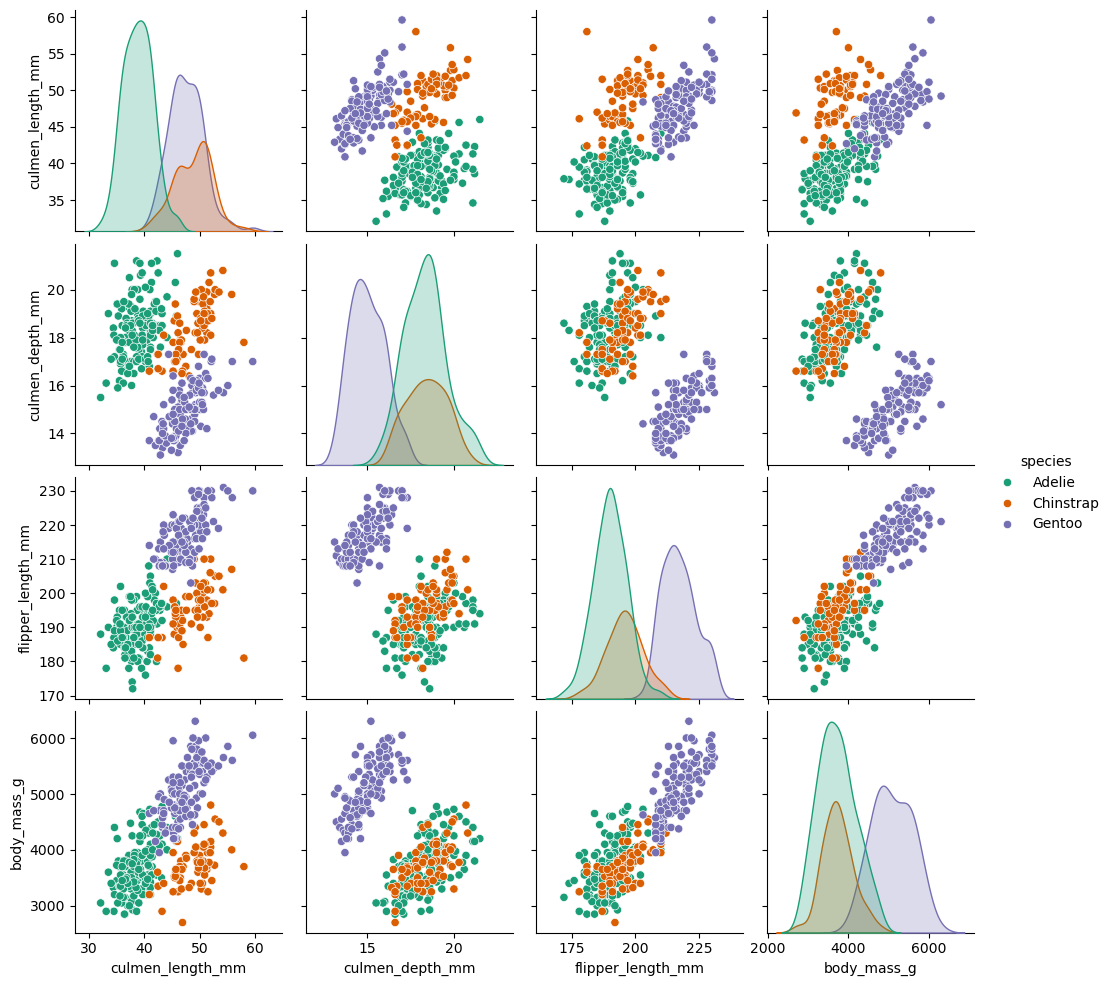

In [14]:
sns.pairplot(df,hue="species",palette="Dark2")

In [15]:

X = pd.get_dummies(df.drop('species',axis=1),drop_first=1 )
y = df['species']

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [17]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [18]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [19]:
base_pred =  model.predict(X_test)

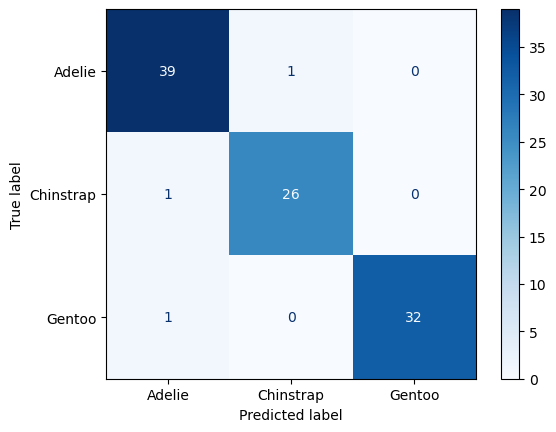

In [20]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
cm  = confusion_matrix(y_test,base_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()


In [21]:
print(classification_report(y_test,base_pred))

              precision    recall  f1-score   support

      Adelie       0.95      0.97      0.96        40
   Chinstrap       0.96      0.96      0.96        27
      Gentoo       1.00      0.97      0.98        33

    accuracy                           0.97       100
   macro avg       0.97      0.97      0.97       100
weighted avg       0.97      0.97      0.97       100



model.feature_importances_ 是決策樹模型中一個非常重要的屬性，它表示每個特徵（變數）對於模型決策的重要性。

具體來說，feature_importances_ 是一個數值列表，列表中的每個數值對應模型中每個特徵的重要性。這些數值通常是介於 0 到 1 之間，總和為 1。值越大，表示該特徵對模型決策的影響越大。

In [22]:
model.feature_importances_

array([0.33350103, 0.02696355, 0.57575804, 0.        , 0.03806069,
       0.        , 0.02571668])

In [23]:
pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['Feature Importance'])

,Feature Importance
culmen_length_mm,0.333501
culmen_depth_mm,0.026964
flipper_length_mm,0.575758
body_mass_g,0.000000
island_Dream,0.038061
island_Torgersen,0.000000
sex_MALE,0.025717


## Visualize the Tree

[Text(0.5416666666666666, 0.9, 'x[2] <= 206.0\ngini = 0.626\nsamples = 233\nvalue = [106, 41, 86]'),
 Text(0.3333333333333333, 0.7, 'x[0] <= 43.35\ngini = 0.4\nsamples = 145\nvalue = [105, 40, 0]'),
 Text(0.16666666666666666, 0.5, 'x[0] <= 42.35\ngini = 0.056\nsamples = 105\nvalue = [102, 3, 0]'),
 Text(0.08333333333333333, 0.3, 'gini = 0.0\nsamples = 97\nvalue = [97, 0, 0]'),
 Text(0.25, 0.3, 'x[6] <= 0.5\ngini = 0.469\nsamples = 8\nvalue = [5, 3, 0]'),
 Text(0.16666666666666666, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 3, 0]'),
 Text(0.3333333333333333, 0.1, 'gini = 0.0\nsamples = 5\nvalue = [5, 0, 0]'),
 Text(0.5, 0.5, 'x[4] <= 0.5\ngini = 0.139\nsamples = 40\nvalue = [3, 37, 0]'),
 Text(0.4166666666666667, 0.3, 'gini = 0.0\nsamples = 3\nvalue = [3, 0, 0]'),
 Text(0.5833333333333334, 0.3, 'gini = 0.0\nsamples = 37\nvalue = [0, 37, 0]'),
 Text(0.75, 0.7, 'x[1] <= 17.65\ngini = 0.045\nsamples = 88\nvalue = [1, 1, 86]'),
 Text(0.6666666666666666, 0.5, 'gini = 0.0\nsamples = 86\nvalue

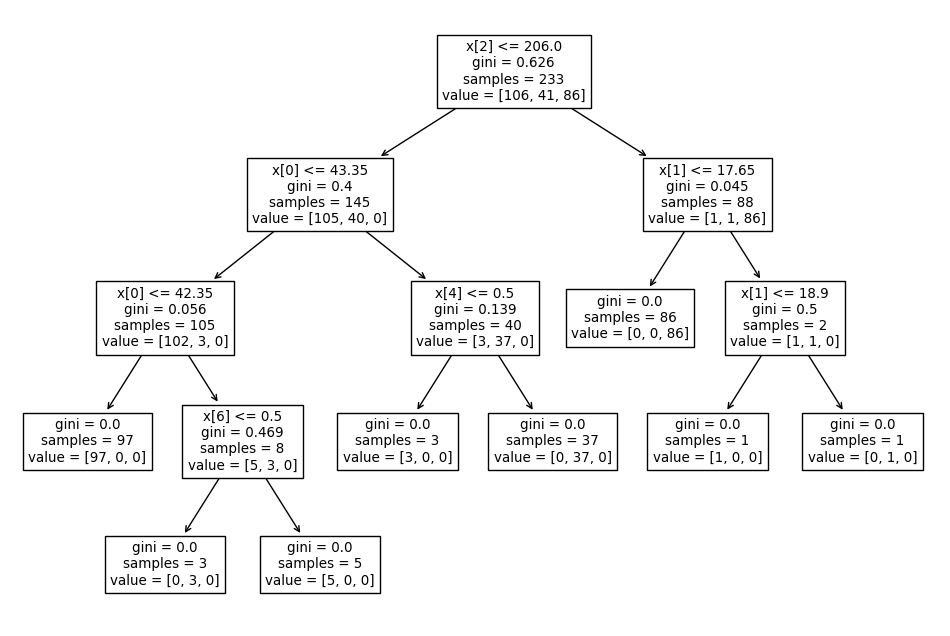

In [24]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12,8))
plot_tree(model)

[Text(0.5416666666666666, 0.9, 'flipper_length_mm <= 206.0\ngini = 0.626\nsamples = 233\nvalue = [106, 41, 86]'),
 Text(0.3333333333333333, 0.7, 'culmen_length_mm <= 43.35\ngini = 0.4\nsamples = 145\nvalue = [105, 40, 0]'),
 Text(0.16666666666666666, 0.5, 'culmen_length_mm <= 42.35\ngini = 0.056\nsamples = 105\nvalue = [102, 3, 0]'),
 Text(0.08333333333333333, 0.3, 'gini = 0.0\nsamples = 97\nvalue = [97, 0, 0]'),
 Text(0.25, 0.3, 'sex_MALE <= 0.5\ngini = 0.469\nsamples = 8\nvalue = [5, 3, 0]'),
 Text(0.16666666666666666, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 3, 0]'),
 Text(0.3333333333333333, 0.1, 'gini = 0.0\nsamples = 5\nvalue = [5, 0, 0]'),
 Text(0.5, 0.5, 'island_Dream <= 0.5\ngini = 0.139\nsamples = 40\nvalue = [3, 37, 0]'),
 Text(0.4166666666666667, 0.3, 'gini = 0.0\nsamples = 3\nvalue = [3, 0, 0]'),
 Text(0.5833333333333334, 0.3, 'gini = 0.0\nsamples = 37\nvalue = [0, 37, 0]'),
 Text(0.75, 0.7, 'culmen_depth_mm <= 17.65\ngini = 0.045\nsamples = 88\nvalue = [1, 1, 86]'),
 Te

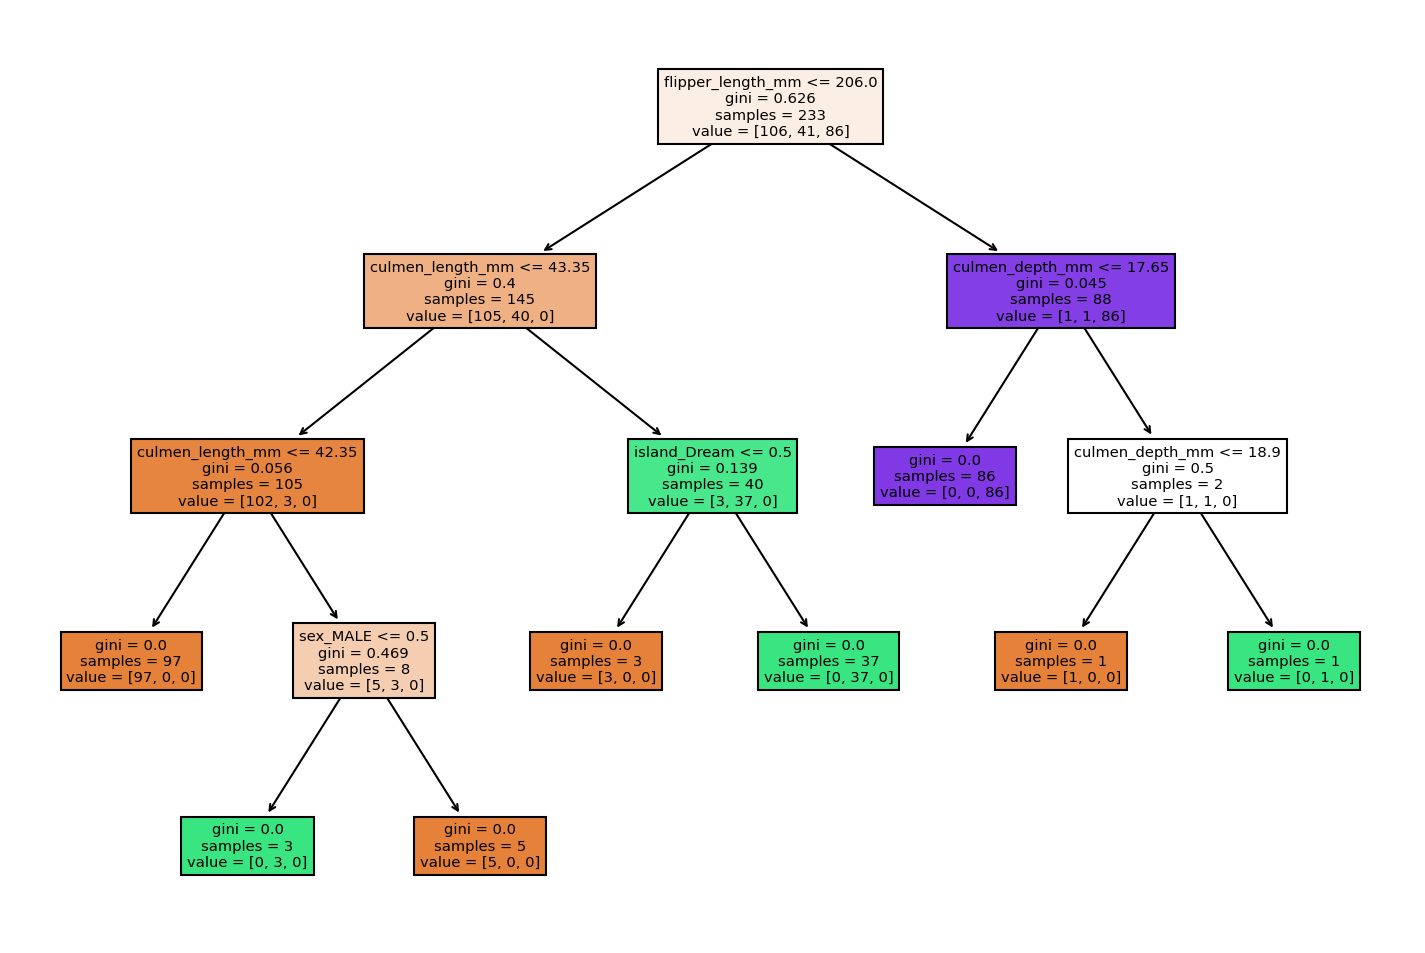

In [25]:
plt.figure(figsize=(12,8),dpi=150)
plot_tree(model,filled=True,feature_names=X.columns)

In [26]:
def report_model(model):
    model_preds =  model.predict(X_test)
    print(classification_report(y_test,model_preds))
    print("\n")
    plt.figure(figsize=(12,8),dpi=150)
    plot_tree(model,filled=True,feature_names=X.columns)

              precision    recall  f1-score   support

      Adelie       0.86      0.95      0.90        40
   Chinstrap       0.92      0.81      0.86        27
      Gentoo       1.00      0.97      0.98        33

    accuracy                           0.92       100
   macro avg       0.93      0.91      0.92       100
weighted avg       0.92      0.92      0.92       100





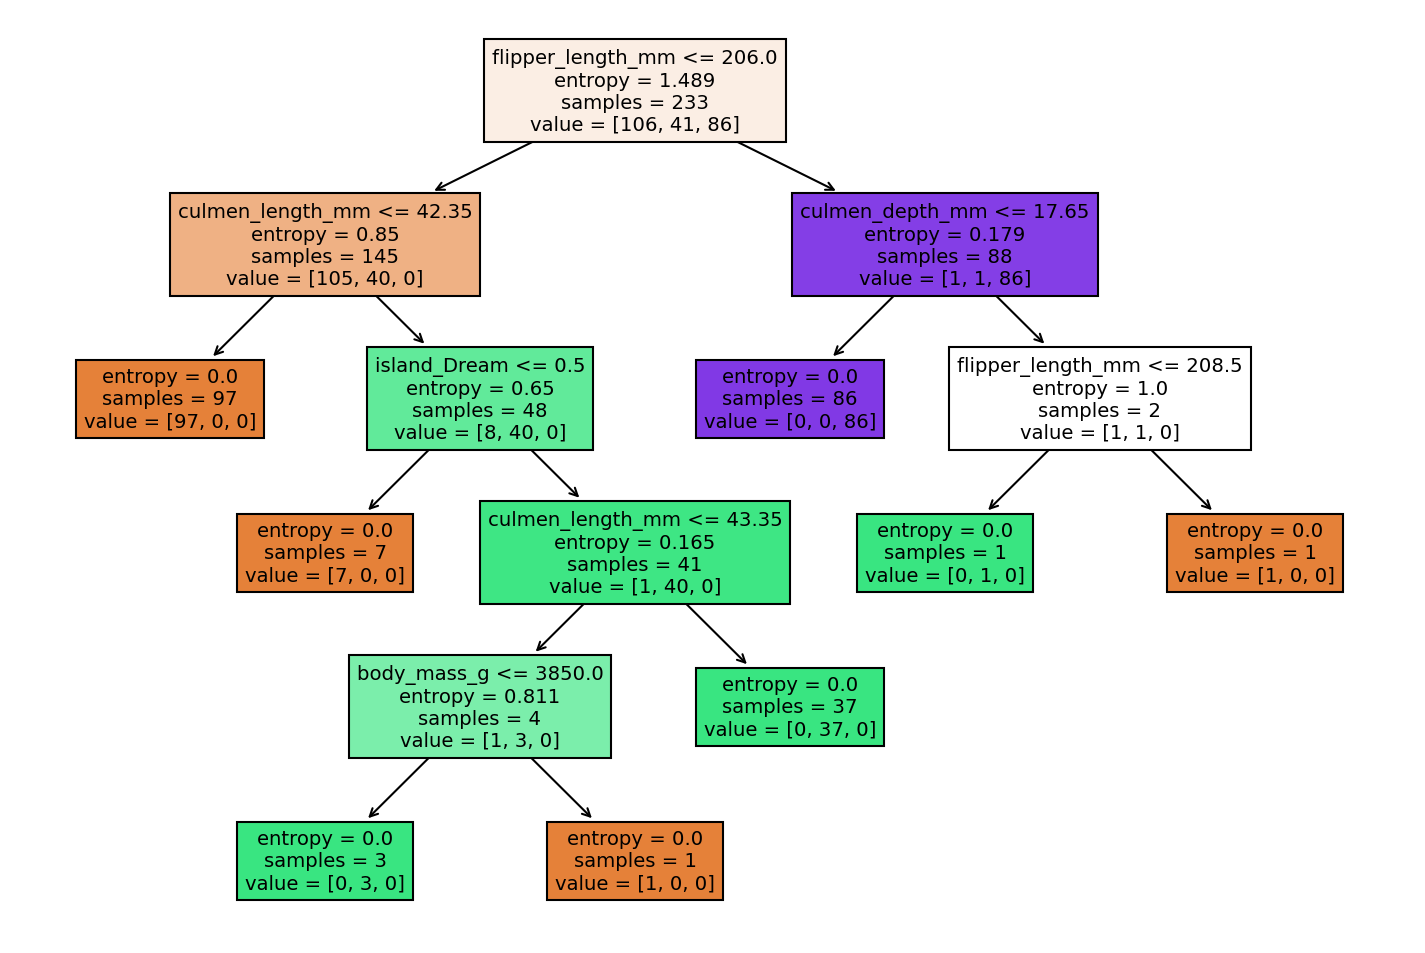

In [27]:
entropy_tree = DecisionTreeClassifier(criterion='entropy')
entropy_tree.fit(X_train,y_train)
report_model(entropy_tree)

### `max_depth`

`max_depth` 指定決策樹的最大深度。深度是從根節點到葉節點的最長路徑上的節點數。如果設定了 `max_depth`，決策樹將限制樹的深度，從而控制樹的複雜度。

- **優點**：限制樹的深度可以防止決策樹過度擬合訓練數據，從而提高模型的泛化能力。
- **缺點**：如果設定過小，可能導致模型欠擬合，無法捕捉數據中的複雜模式。

### `max_leaf_nodes`

`max_leaf_nodes` 指定決策樹的最大葉節點數。葉節點是樹的終端節點，代表最終的分類決策。如果設定了 `max_leaf_nodes`，決策樹將限制葉節點的數量，從而限制樹的複雜度。

- **優點**：限制葉節點數可以防止決策樹過於複雜，從而減少過擬合的風險。
- **缺點**：如果設定過小，可能導致決策樹欠擬合，無法充分學習數據中的模式。


              precision    recall  f1-score   support

      Adelie       0.87      0.97      0.92        40
   Chinstrap       0.91      0.78      0.84        27
      Gentoo       1.00      0.97      0.98        33

    accuracy                           0.92       100
   macro avg       0.93      0.91      0.91       100
weighted avg       0.92      0.92      0.92       100





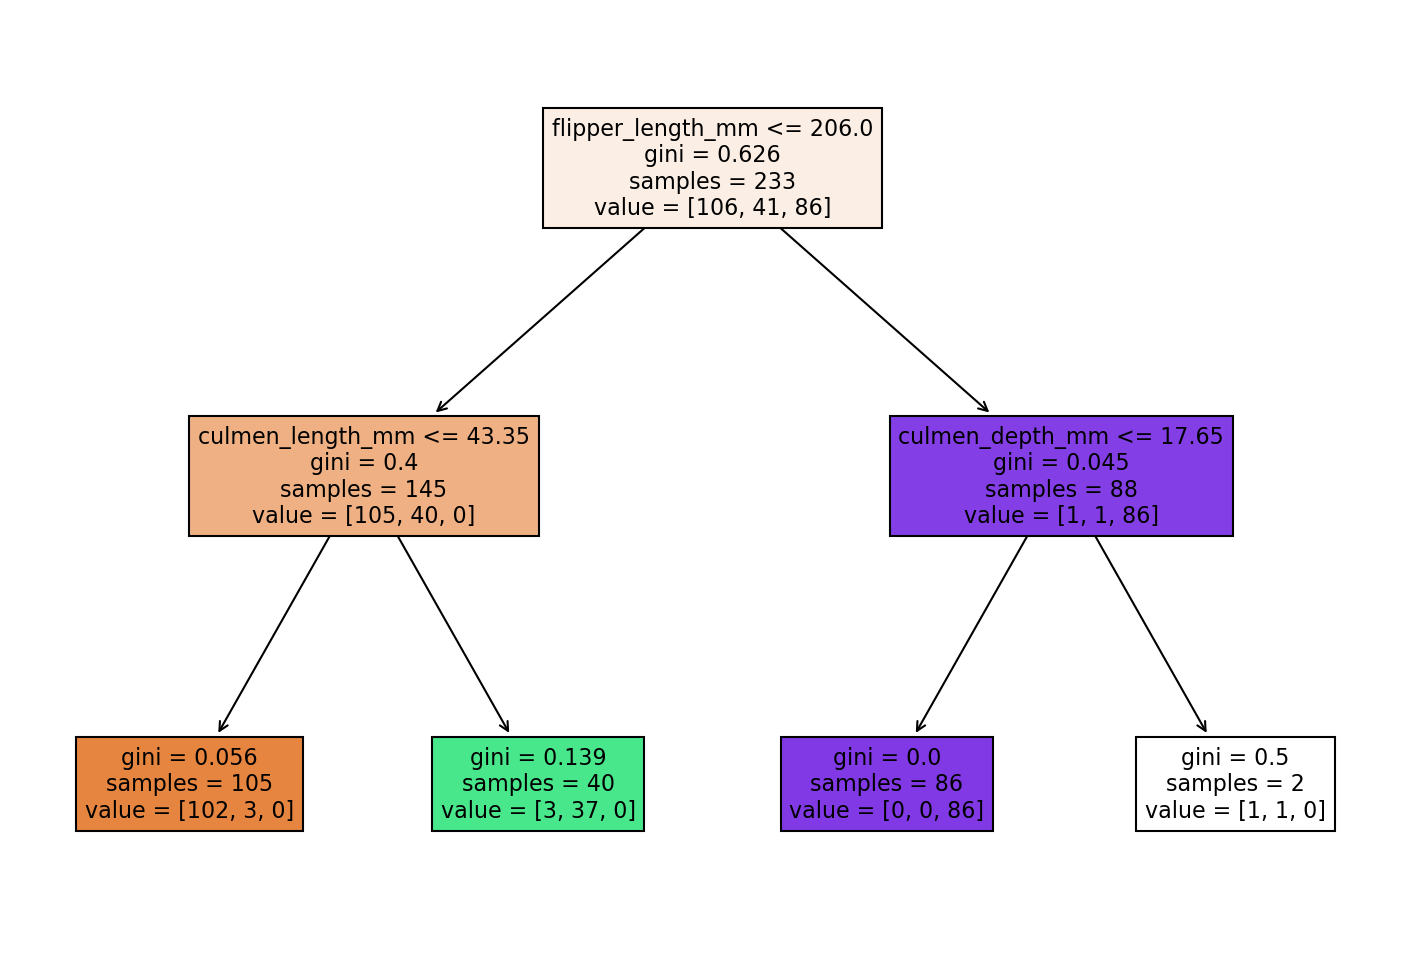

In [28]:
pruned_tree = DecisionTreeClassifier(max_depth=2)
pruned_tree.fit(X_train,y_train)
report_model(pruned_tree)

## Max Leaf Nodes

              precision    recall  f1-score   support

      Adelie       0.87      0.97      0.92        40
   Chinstrap       0.96      0.81      0.88        27
      Gentoo       1.00      0.97      0.98        33

    accuracy                           0.93       100
   macro avg       0.94      0.92      0.93       100
weighted avg       0.93      0.93      0.93       100





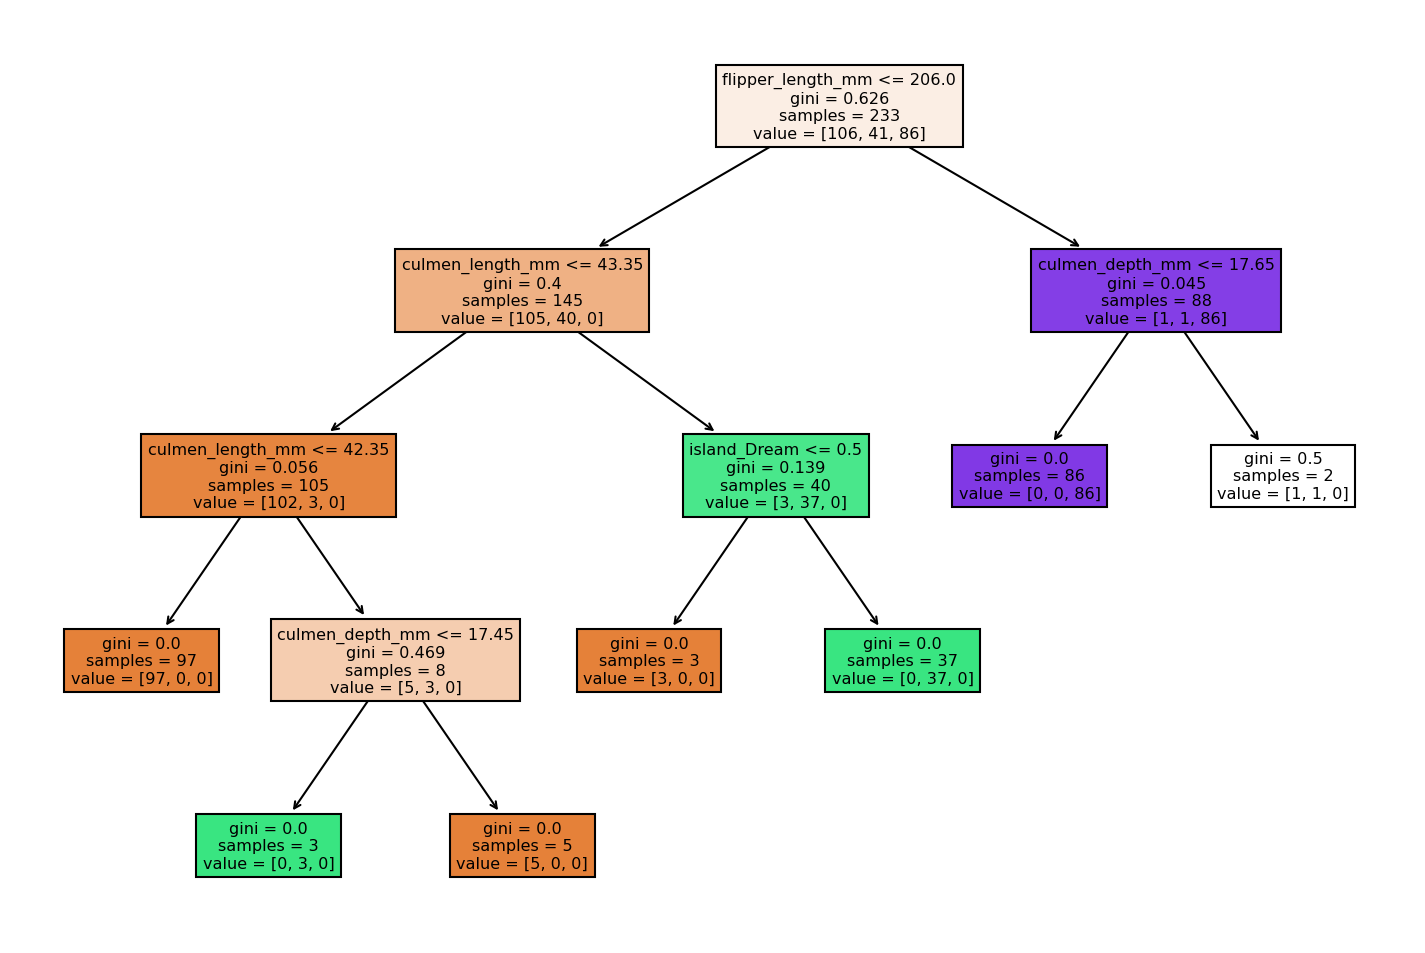

In [29]:
pruned_tree = DecisionTreeClassifier(max_leaf_nodes=7)
pruned_tree.fit(X_train,y_train)
report_model(pruned_tree)

# Random Forest - Classification



### Random Forests (隨機森林)
1. **多個決策樹組成**：
   - 隨機森林由多個決策樹（樹的數量稱為樹的數量）組成，每棵樹獨立生成。
   - 每棵樹只使用訓練數據的一部分（通過Bootstrap隨機抽樣）和隨機選擇的一部分特徵。

2. **集成學習方法**：
   - 隨機森林是一種集成學習方法，通過結合多個決策樹的預測結果來提高模型的準確性和穩定性。
   - 對於分類任務，隨機森林通過投票方式決定最終類別；對於回歸任務，通過平均所有樹的預測結果來獲得最終結果。

3. **抗過擬合能力強**：
   - 隨機森林由於綜合了多棵樹的預測結果，減少了單棵樹過擬合的風險，具有更好的泛化能力。
   - 通過引入隨機性來減少模型的變異性，提高了預測準確性。

### 總結
- **決策樹**適用於需要簡單解釋和快速預測的情況，但容易過擬合。
- **隨機森林**則通過多棵樹的結合，提供了更高的準確性和穩定性，適用於更複雜的問題。

這些差異使得隨機森林在實際應用中更加常用，特別是在需要高準確性和穩定性的任務中。

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
df = pd.read_csv("penguins_size.csv")
df = df.dropna()


In [32]:
df = pd.read_csv("penguins_size.csv")
df = df.dropna()
df = df[df["sex"] != '.']#過濾是.的性別

In [33]:
X = pd.get_dummies(df.drop("species",axis=1),drop_first=True)
y =  df["species"]


In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
#'sqrt' 表示在每個節點處隨機選擇的特徵數量將是總特徵數的平方根，
#n_estimators 決策樹的數量
model = RandomForestClassifier(n_estimators=10,max_features='sqrt',random_state=101)
model.fit(X_train,y_train)
preds = model.predict(X_test)

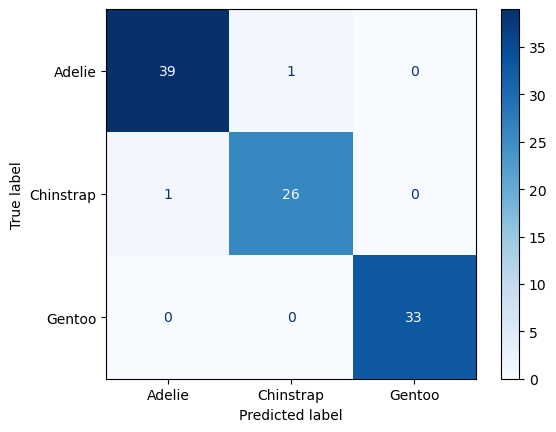

In [43]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test,preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()


In [38]:
test_error = []

for n in range(1,40):
    model = RandomForestClassifier(n_estimators=n,max_features='sqrt',random_state=101)
    model.fit(X_train,y_train)
    test_preds = model.predict(X_test)
    test_error.append(1-accuracy_score(test_preds,y_test) )

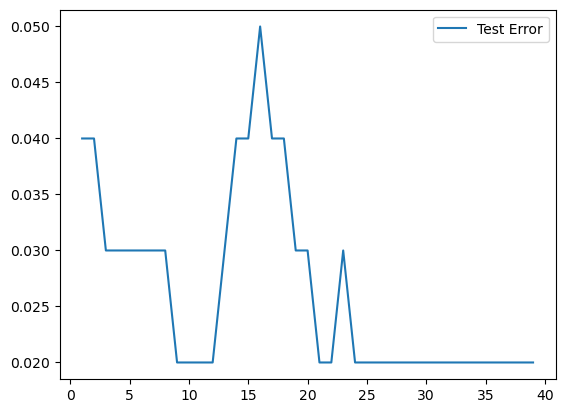

In [39]:
plt.plot(range(1,40),test_error,label="Test Error")
plt.legend()